In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/Sravanth0099/Python-and-PowerBI-Projects/refs/heads/main/HealthCare_Analysis/rawdata/global_cancer_patients_2015_2024.csv?token=GHSAT0AAAAAADC7OCBCAUF3GXY3KMLE4OYW2AQ6C2A')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [6]:
df.shape

(50000, 15)

In [7]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

This indicates we dont have any Null values in teh dataset

In [8]:
df.duplicated().sum()

np.int64(0)

no duplicate rows in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [10]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


By observing the info we can see that year column is of type INT
Convert Year column to a datetime type if needed 
Although Year is provided as an integer, we can infer a date-type by converting it to a proper datetime format

In [11]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [14]:
#we actually dosent need patient_id column
df.drop(columns=['Patient_ID'], inplace=True,axis=1)

In [15]:
# Some columns are categorical and might need type conversion
categorical_columns = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [16]:
# Display data types after conversion for clarity
print('\nData types after conversion:')
print(df.dtypes)


Data types after conversion:
Age                               int64
Gender                         category
Country_Region                 category
Year                     datetime64[ns]
Genetic_Risk                    float64
Air_Pollution                   float64
Alcohol_Use                     float64
Smoking                         float64
Obesity_Level                   float64
Cancer_Type                    category
Cancer_Stage                   category
Treatment_Cost_USD              float64
Survival_Years                  float64
Target_Severity_Score           float64
dtype: object


In [17]:
df['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

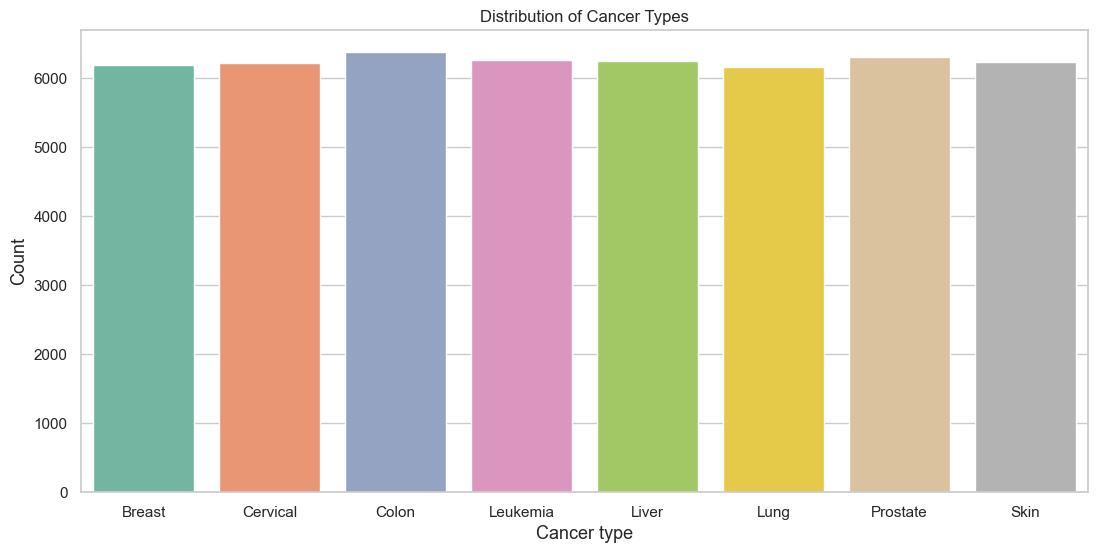

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13, 6))
sns.countplot(x='Cancer_Type', hue='Cancer_Type', data=df, palette='Set2', legend=False)
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()
#distribution of cancer types

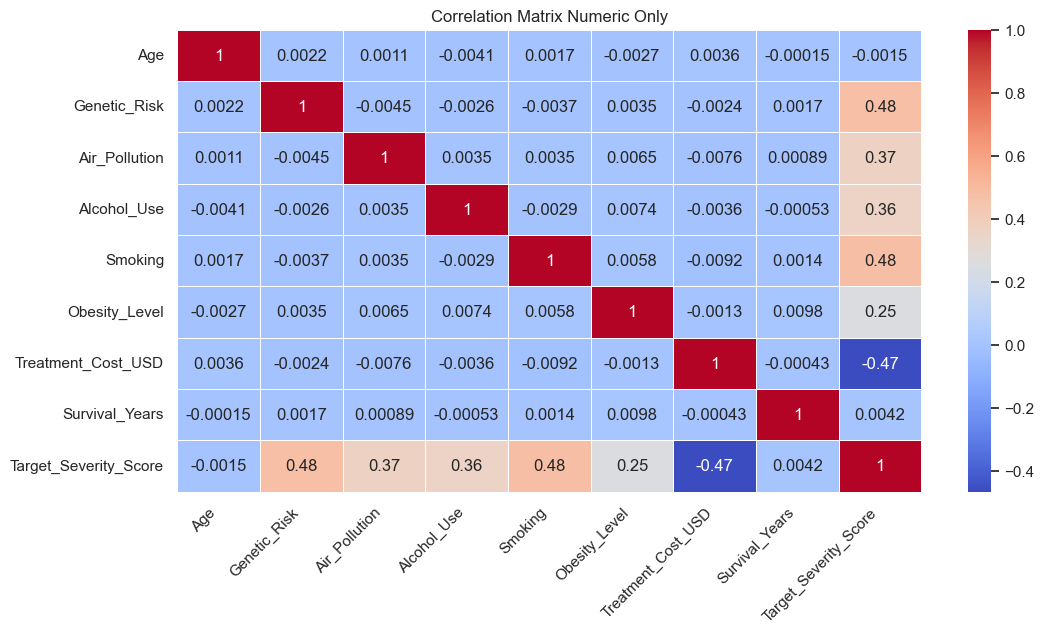

In [31]:
cm = df.corr(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Numeric Only')
plt.xticks(rotation=45, ha='right')
plt.show()

from the Correlation matrix we can say that 
Genetic_Risk	     0.48	Strong positive impact — higher genetic risk means higher severity
Smoking	             0.48	Same — smoking is a strong contributor to severity
Air_Pollution	     0.37	Moderate positive impact
Alcohol_Use	         0.36	Moderate positive impact
Obesity_Level	     0.25	Mild impact
Treatment_Cost_USD	-0.47	Negative correlation — possibly, higher severity patients cost less.
Survival_Years	      ~0	Almost no correlation with severity 

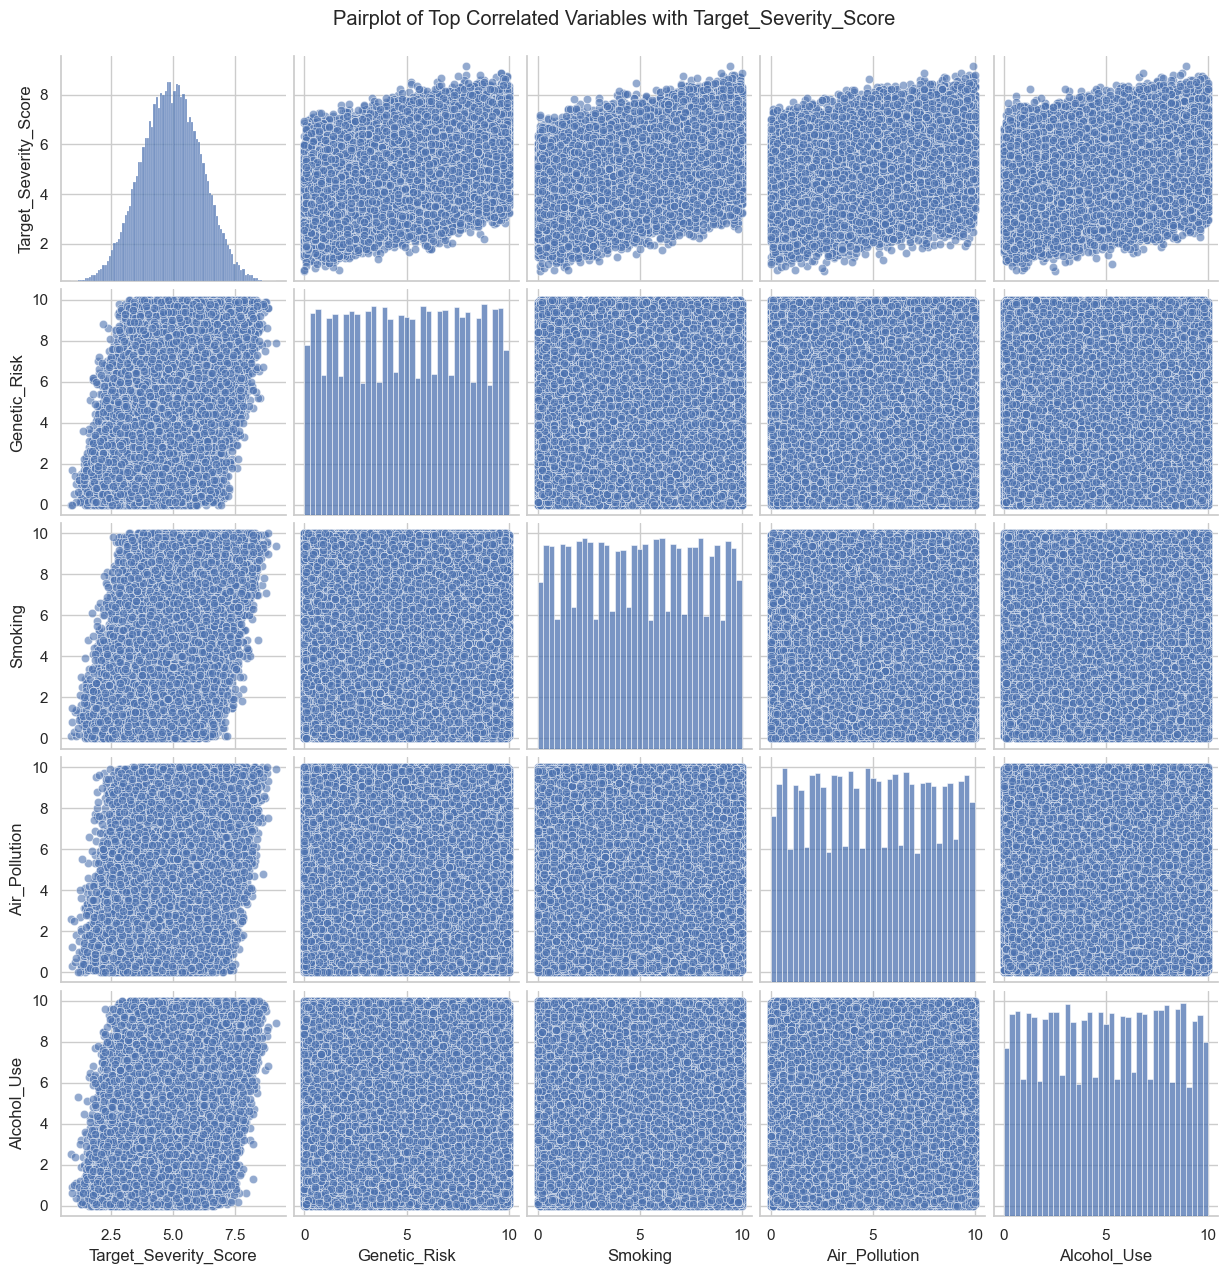

In [32]:
# Select top correlated variables with Target_Severity_Score
top_vars = ['Target_Severity_Score', 'Genetic_Risk', 'Smoking', 'Air_Pollution', 'Alcohol_Use']

# Create a pairplot
sns.pairplot(df[top_vars], kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top Correlated Variables with Target_Severity_Score', y=1.02)
plt.show()

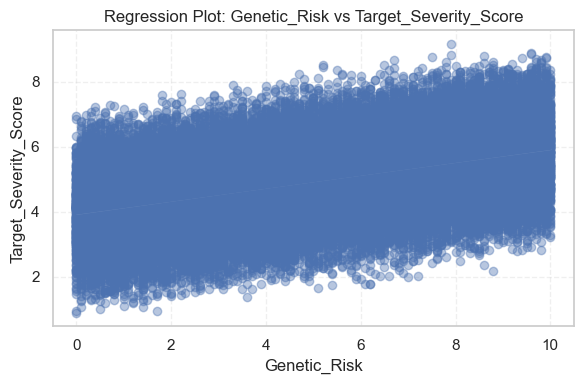

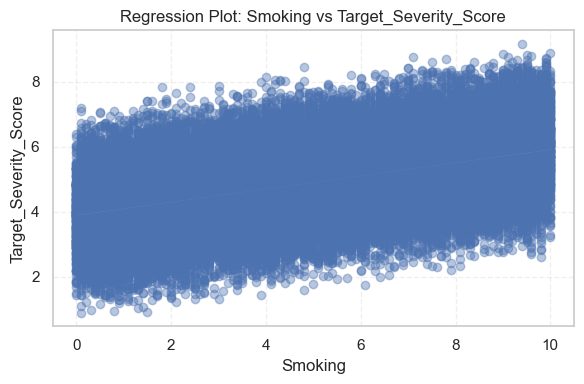

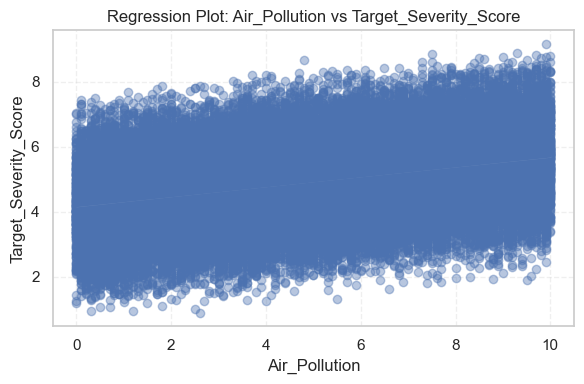

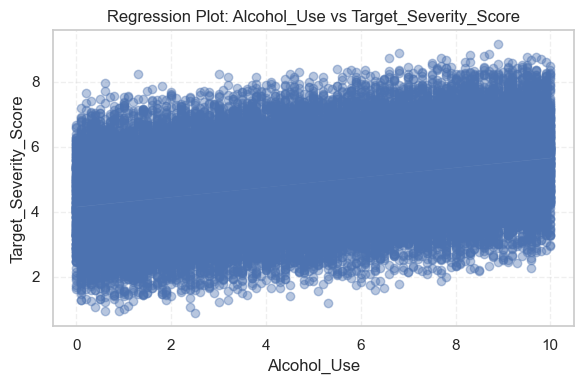

In [33]:
top_vars.remove('Target_Severity_Score')  # exclude target itself for looping

for var in top_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Target_Severity_Score', data=df, scatter_kws={'alpha': 0.4})
    plt.title(f'Regression Plot: {var} vs Target_Severity_Score')
    plt.xlabel(var)
    plt.ylabel('Target_Severity_Score')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


Linear Regression 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = df[['Smoking', 'Alcohol_Use', 'Genetic_Risk', 'Air_Pollution', 'Obesity_Level']]
y = df['Target_Severity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predict
y_pred = lr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.7853162208540059
RMSE: 0.5523017263208595


R² Score: 0.7853162208540059 shows that our model features are strong predictors of severity
RMSE = 0.55 means that our model typically predicts severity scores with about half a unit of error.

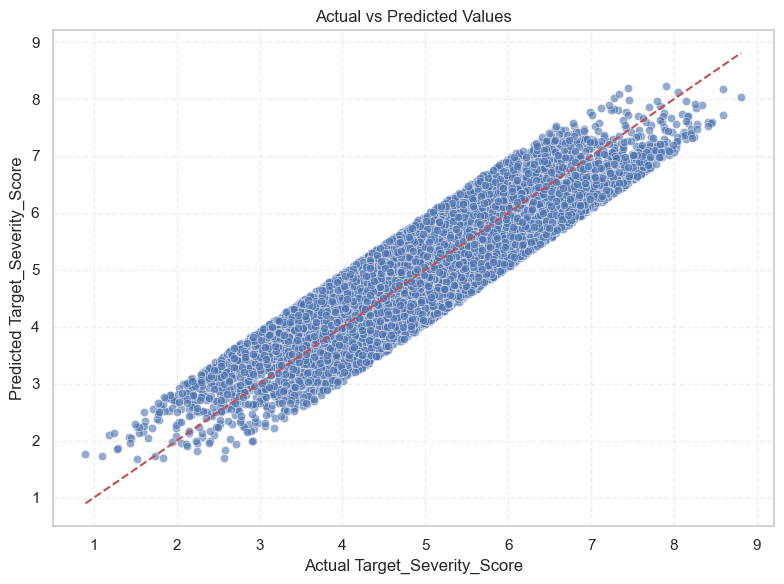

In [42]:


# actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Target_Severity_Score')
plt.ylabel('Predicted Target_Severity_Score')
plt.title('Actual vs Predicted Values')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Points are tightly clustered along the red line	Model is predicting values very close to actual values

In [41]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

         Feature  Coefficient
0        Smoking     0.202254
2   Genetic_Risk     0.201249
3  Air_Pollution     0.151511
1    Alcohol_Use     0.150968
4  Obesity_Level     0.100350


Summary from the EDA and Model development

1. Smoking and Genetic Risk are the strongest predictors

They have the highest coefficients
Even a small increase in these factors meaningfully raises the severity score

2. Air Pollution and Alcohol Use also matter
Their coefficients (~0.15) show moderate but consistent contributions

3. Obesity_Level contributes the least (among these features)
But still positively correlated, so it's worth keeping in the model

The regression coefficients reveal that Smoking and Genetic Risk are the most influential factors in predicting Target_Severity_Score, with each unit increase resulting in a ~0.2 increase in severity. Air Pollution and Alcohol Use also significantly contribute, while Obesity Level has a smaller but still positive impact.

In [ ]:
#convert the cleaned data to csv file
df.to_csv('cleaned_cancer_data.csv', index=False)